In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data","LINKED_DATA", "TSR_ALL", "TSR_ALL1","TSR_ALL1_MICE1.csv")
tsr_all1_df = pd.read_csv(csv_path)
tsr_all1_df.shape

(44850, 233)

# Barthel vs NIHSS vs mRS

In [3]:
barthel = tsr_all1_df.feeding + tsr_all1_df.transfers + tsr_all1_df.bathing + tsr_all1_df.toilet_use + tsr_all1_df.grooming + tsr_all1_df.mobility + tsr_all1_df.stairs + tsr_all1_df.dressing + tsr_all1_df.bowel_control + tsr_all1_df.bladder_control
nihss_out = tsr_all1_df.nihs_1a_out + tsr_all1_df.nihs_1b_out + tsr_all1_df.nihs_1c_out + tsr_all1_df.nihs_2_out + tsr_all1_df.nihs_3_out + tsr_all1_df.nihs_4_out + tsr_all1_df.nihs_5al_out + tsr_all1_df.nihs_5br_out + tsr_all1_df.nihs_6al_out + tsr_all1_df.nihs_6br_out + tsr_all1_df.nihs_7_out + tsr_all1_df.nihs_8_out + tsr_all1_df.nihs_9_out + tsr_all1_df.nihs_10_out + tsr_all1_df.nihs_11_out
discharged_mrs = tsr_all1_df.discharged_mrs

score = pd.DataFrame([discharged_mrs, barthel, nihss_out]).T
score.columns = ["discharged_mrs", "barthel", "nihss_out"]
score["number"] = 1

total_number = score.groupby(["discharged_mrs", "barthel", "nihss_out"]).count()
total_number.reset_index(inplace=True)
total_number

discharged_mrs = total_number.discharged_mrs.values
barthel = total_number.barthel.values
nihss_out = total_number.nihss_out.values
number = total_number.number.values

C:\Users\Jacky C\anaconda3\envs\tsr_ml\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


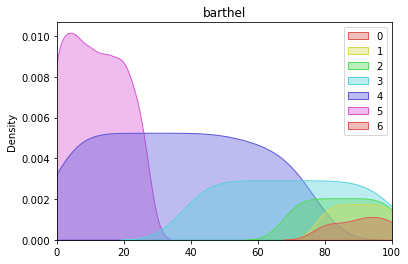

In [4]:
sns.kdeplot(barthel,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.rcParams['figure.figsize'] = (10,5)
#plt.legend(loc=1)
#plt.savefig("barthel.png")
plt.show()

C:\Users\Jacky C\anaconda3\envs\tsr_ml\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


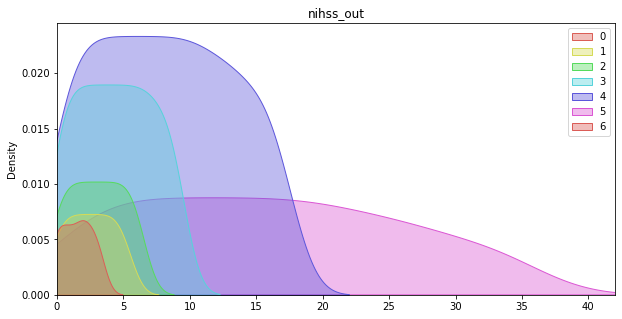

In [5]:
sns.kdeplot(nihss_out,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.rcParams['figure.figsize'] = (10,5)
#plt.savefig("nihss_out.png")
plt.show()

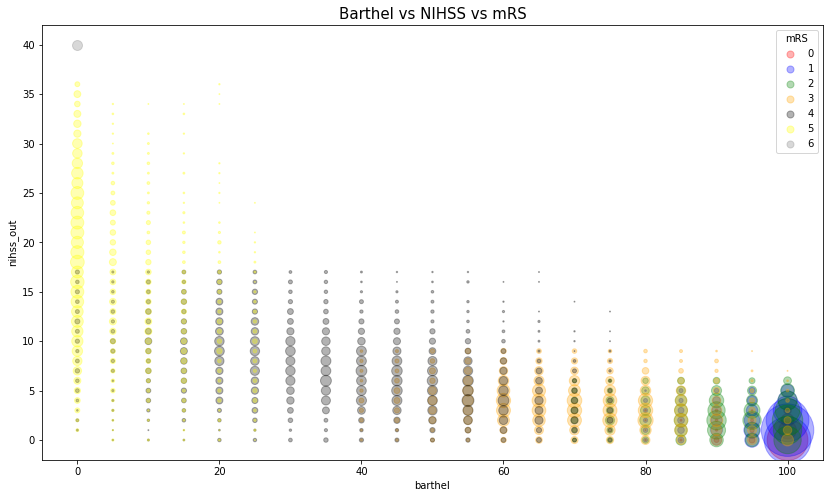

In [6]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(barthel, nihss_out, c =  discharged_mrs, s = number, alpha = 0.7, cmap = "jet")
plt.scatter(barthel[discharged_mrs == 0], nihss_out[discharged_mrs == 0], c =  "red", s = number[discharged_mrs == 0], alpha = 0.3, label = 0)
plt.scatter(barthel[discharged_mrs == 1], nihss_out[discharged_mrs == 1], c =  "blue", s = number[discharged_mrs == 1], alpha = 0.3, label = 1)
plt.scatter(barthel[discharged_mrs == 2], nihss_out[discharged_mrs == 2], c =  "green", s = number[discharged_mrs == 2], alpha = 0.3, label = 2)
plt.scatter(barthel[discharged_mrs == 3], nihss_out[discharged_mrs == 3], c =  "orange", s = number[discharged_mrs == 3], alpha = 0.3, label = 3)
plt.scatter(barthel[discharged_mrs == 4], nihss_out[discharged_mrs == 4], c = "black" , s = number[discharged_mrs == 4], alpha = 0.3, label = 4)
plt.scatter(barthel[discharged_mrs == 5], nihss_out[discharged_mrs == 5], c = "yellow" , s = number[discharged_mrs == 5], alpha = 0.3, label = 5)
plt.scatter(barthel[discharged_mrs == 6], nihss_out[discharged_mrs == 6], c = "grey" , s = number[discharged_mrs == 6]*100, alpha = 0.3, label = 6)
plt.title('Barthel vs NIHSS vs mRS', fontsize=15)
plt.xlabel('barthel')
plt.ylabel('nihss_out')
lgnd = plt.legend(title = "mRS")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
plt.savefig('INFO/TSR_ALL1/Barthel_NIHSS_mRS_2D.png')
plt.show()

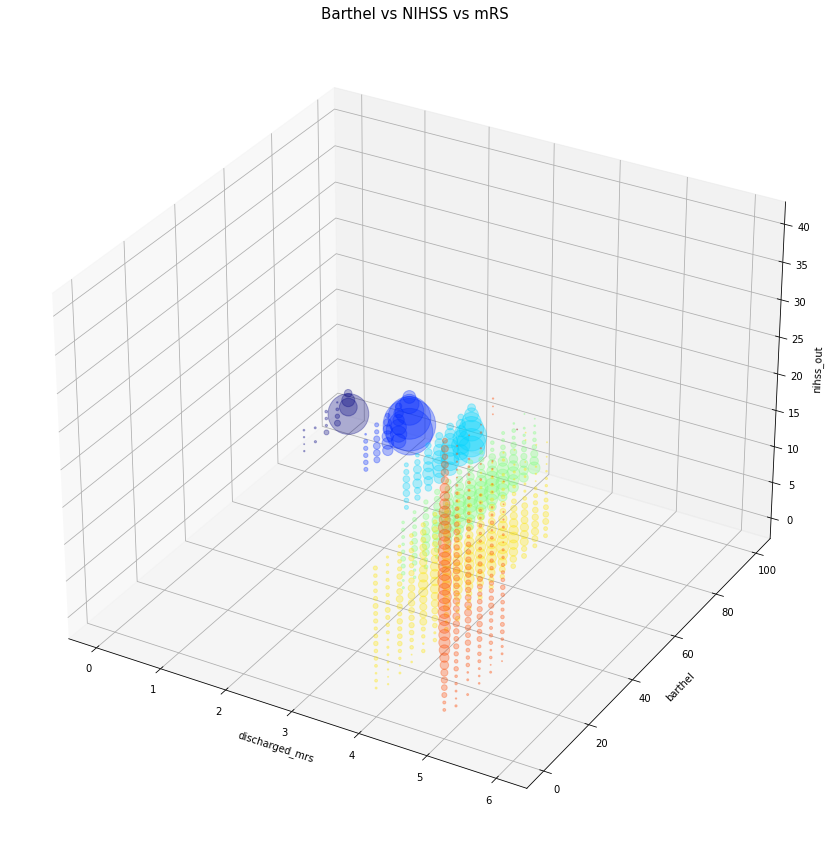

In [7]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(discharged_mrs, barthel, nihss_out, s = number, c = discharged_mrs, cmap = "jet", alpha = 0.3)
ax.set_title('Barthel vs NIHSS vs mRS', fontsize=15)
ax.set_xlabel('discharged_mrs')
ax.set_ylabel('barthel')
ax.set_zlabel('nihss_out')
plt.savefig('INFO/TSR_ALL1/Barthel_NIHSS_mRS_3D.png')
plt.show()

# Convert the multiple feature and outcome into binary ones

In [8]:
mRS1 = tsr_all1_df.mrs_tx_1
mRS1[(mRS1 == 0) | (mRS1 == 1) | (mRS1 == 2)] = 1 #GOOD
mRS1[(mRS1 == 3) | (mRS1 == 4) | (mRS1 == 5) | (mRS1 == 6) | (mRS1 == 9)] = 0 #BAD

discharged = tsr_all1_df.discharged_mrs
discharged[(discharged == 0) | (discharged == 1) | (discharged == 2)] = 1 #GOOD
discharged[(discharged == 3) | (discharged == 4) | (discharged == 5) | (discharged == 6) | (discharged == 9)] = 0 #BAD

<ipython-input-8-203e4a5c313b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRS1[(mRS1 == 0) | (mRS1 == 1) | (mRS1 == 2)] = 1 #GOOD
<ipython-input-8-203e4a5c313b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRS1[(mRS1 == 3) | (mRS1 == 4) | (mRS1 == 5) | (mRS1 == 6) | (mRS1 == 9)] = 0 #BAD
<ipython-input-8-203e4a5c313b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged[(discharged == 0) | (discharged == 1) | (discharg

# Barthel vs NIHSS vs mRS (2 classes)

In [9]:
barthel = tsr_all1_df.feeding + tsr_all1_df.transfers + tsr_all1_df.bathing + tsr_all1_df.toilet_use + tsr_all1_df.grooming + tsr_all1_df.mobility + tsr_all1_df.stairs + tsr_all1_df.dressing + tsr_all1_df.bowel_control + tsr_all1_df.bladder_control
nihss_out = tsr_all1_df.nihs_1a_out + tsr_all1_df.nihs_1b_out + tsr_all1_df.nihs_1c_out + tsr_all1_df.nihs_2_out + tsr_all1_df.nihs_3_out + tsr_all1_df.nihs_4_out + tsr_all1_df.nihs_5al_out + tsr_all1_df.nihs_5br_out + tsr_all1_df.nihs_6al_out + tsr_all1_df.nihs_6br_out + tsr_all1_df.nihs_7_out + tsr_all1_df.nihs_8_out + tsr_all1_df.nihs_9_out + tsr_all1_df.nihs_10_out + tsr_all1_df.nihs_11_out
discharged_mrs = tsr_all1_df.discharged_mrs

score = pd.DataFrame([discharged_mrs, barthel, nihss_out]).T
score.columns = ["discharged_mrs", "barthel", "nihss_out"]
score["number"] = 1

total_number = score.groupby(["discharged_mrs", "barthel", "nihss_out"]).count()
total_number.reset_index(inplace=True)
total_number

discharged_mrs = total_number.discharged_mrs.values
barthel = total_number.barthel.values
nihss_out = total_number.nihss_out.values
number = total_number.number.values

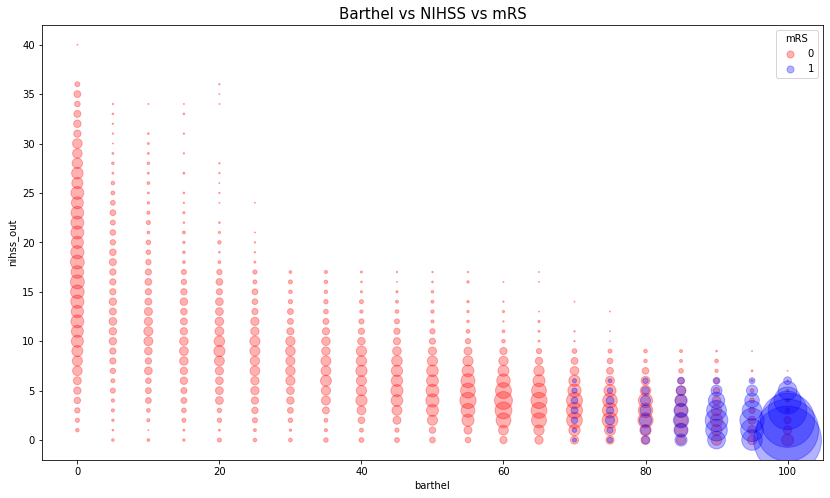

In [10]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(barthel, nihss_out, c =  discharged_mrs, s = number, alpha = 0.7, cmap = "jet")
plt.scatter(barthel[discharged_mrs == 0], nihss_out[discharged_mrs == 0], c =  "red", s = number[discharged_mrs == 0], alpha = 0.3, label = 0)
plt.scatter(barthel[discharged_mrs == 1], nihss_out[discharged_mrs == 1], c =  "blue", s = number[discharged_mrs == 1], alpha = 0.3, label = 1)
plt.title('Barthel vs NIHSS vs mRS', fontsize=15)
plt.xlabel('barthel')
plt.ylabel('nihss_out')
lgnd = plt.legend(title = "mRS")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
plt.savefig('INFO/TSR_ALL1/Barthel_NIHSS_mRS2_2D.png')
plt.show()

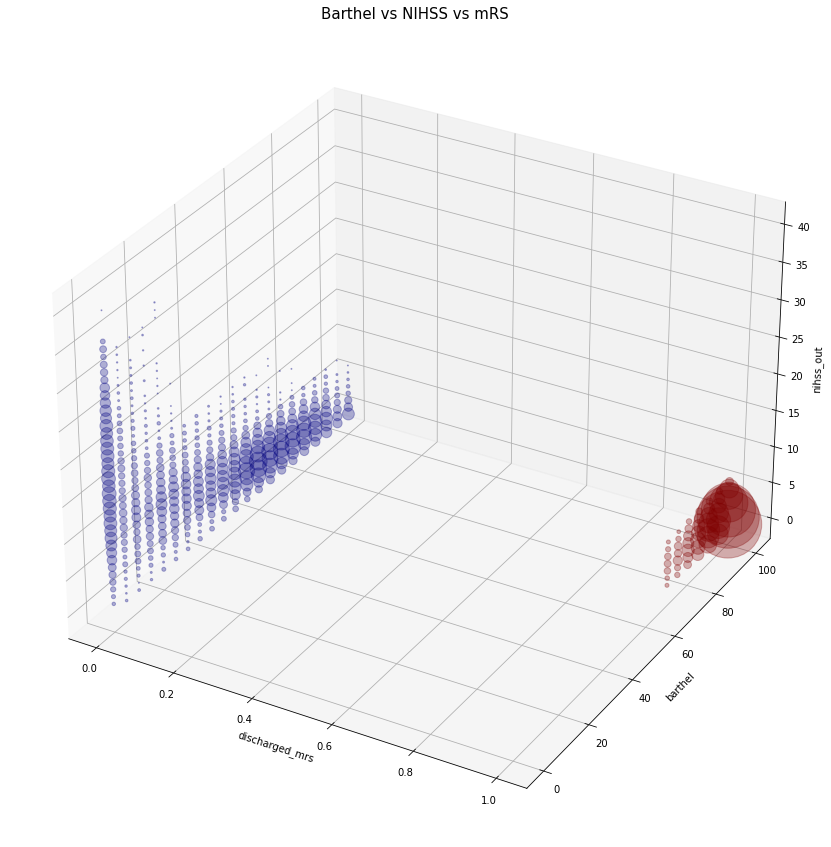

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(discharged_mrs, barthel, nihss_out, s = number, c = discharged_mrs, cmap = "jet", alpha = 0.3)
ax.set_title('Barthel vs NIHSS vs mRS', fontsize=15)
ax.set_xlabel('discharged_mrs')
ax.set_ylabel('barthel')
ax.set_zlabel('nihss_out')
plt.savefig('INFO/TSR_ALL1/Barthel_NIHSS_mRS2_3D.png')
plt.show()

# Calculate the proportion of changes

## From discharge to 1-month follow-up

In [12]:
print("GOOD remained GOOD:", len(discharged[(discharged==1) & (mRS1 == 1)]), "(",round(20078/(20078+628)*100,1),"%)")
print("GOOD became worse into BAD:", len(discharged[(discharged==1) & (mRS1 == 0)]), "(",round(628/(20078+628)*100,1),"%)")
print("BAD became better into GOOD:", len(discharged[(discharged==0) & (mRS1 == 1)]), "(",round(2985/(2985+21159)*100,1),"%)")
print("BAD remained BAD:", len(discharged[(discharged==0) & (mRS1 == 0)]), "(",round(21159/(2985+21159)*100,1),"%)")

GOOD remained GOOD: 20078 ( 97.0 %)
GOOD became worse into BAD: 628 ( 3.0 %)
BAD became better into GOOD: 2985 ( 12.4 %)
BAD remained BAD: 21159 ( 87.6 %)


# Sankey Diagram

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
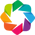

In [13]:
import holoviews as hv
hv.extension('bokeh')

## From discharged to 1-month follow-up:

In [14]:
mRS_chart_1 = [{"Discharged_mRS": "GOOD_0", "One-month_mRS": "GOOD_1", "Value": 18417},
             {"Discharged_mRS": "GOOD_0", "One-month_mRS": "BAD_1", "Value": 523},
             {"Discharged_mRS": "BAD_0", "One-month_mRS": "GOOD_1", "Value": 2761},
             {"Discharged_mRS": "BAD_0", "One-month_mRS": "BAD_1", "Value": 18180}]

mRS_chart_df_1 = pd.DataFrame(mRS_chart_1)
mRS_chart_df_1

Discharged_mRS One-month_mRS  Value
0         GOOD_0        GOOD_1  18417
1         GOOD_0         BAD_1    523
2          BAD_0        GOOD_1   2761
3          BAD_0         BAD_1  18180

In [15]:
mRS_1_Sanky = hv.Sankey(mRS_chart_df_1)
hv.save(mRS_1_Sanky, 'INFO/TSR_ALL1/mRS_1_Sanky.png', dpi=600)
mRS_1_Sanky

:Sankey   [Discharged_mRS,One-month_mRS]   (Value)

# Correlation

## Group all features and the outcome

In [16]:
nominal_features = ["edu_id", "pro_id", "opc_id", "toast_id", "offdt_id", "gender_tx", "hd_id", "pcva_id", 
                    "pcvaci_id", "pcvach_id", "po_id", "ur_id", "sm_id", "ptia_id", "hc_id", "hcht_id", 
                    "hchc_id", "ht_id", "dm_id", "pad_id", "al_id", "ca_id", "fahiid_parents_1", 
                    "fahiid_parents_2", "fahiid_parents_3", "fahiid_parents_4", "fahiid_brsi_1", 
                    "fahiid_brsi_2", "fahiid_brsi_3", "fahiid_brsi_4"]

ordinal_features = ["gcse_nm", "gcsv_nm", "gcsm_nm", "discharged_mrs", "feeding", "transfers", 
                    "bathing", "toilet_use", "grooming", "mobility", "stairs", "dressing", "bowel_control", 
                    "bladder_control", "nihs_1a_in", "nihs_1b_in", "nihs_1c_in", "nihs_2_in", "nihs_3_in", "nihs_4_in", 
                    "nihs_5al_in", "nihs_5br_in", "nihs_6al_in", "nihs_6br_in", "nihs_7_in", "nihs_8_in", "nihs_9_in", 
                    "nihs_10_in", "nihs_11_in", "nihs_1a_out", "nihs_1b_out", "nihs_1c_out", "nihs_2_out", "nihs_3_out", 
                    "nihs_4_out", "nihs_5al_out", "nihs_5br_out", "nihs_6al_out", "nihs_6br_out", "nihs_7_out", 
                    "nihs_8_out", "nihs_9_out", "nihs_10_out", "nihs_11_out"]

boolean = ["toastle_fl", "toastli_fl", "toastsce_fl", "toastsmo_fl", "toastsra_fl", "toastsdi_fl", 
           "toastsmi_fl", "toastsantip_fl", "toastsau_fl", "toastshy_fl", "toastspr_fl", "toastsantit_fl",
           "toastsho_fl", "toastshys_fl", "toastsca_fl", "thda_fl", "thdh_fl", "thdi_fl", "thdam_fl", "thdv_fl",
           "thde_fl", "thdm_fl", "thdr_fl", "thdp_fl", "trman_fl", "trmas_fl", "trmti_fl", "trmhe_fl", 
           "trmwa_fl", "trmia_fl", "trmfo_fl", "trmta_fl", "trmsd_fl", "trmre_fl", "trmen_fl", "trmag_fl", 
           "trmcl_fl", "trmpl_fl", "trmlm_fl", "trmiv_fl", "trmve_fl", "trmng_fl", "trmdy_fl", "trmicu_fl", 
           "trmsm_fl", "trmed_fl", "trmop_fl", "om_fl", "omas_fl", "omag_fl", "omti_fl", "omcl_fl", "omwa_fl",
           "ompl_fl", "omanh_fl", "omand_fl", "omli_fl", "am_fl", "amas_fl", "amag_fl", "amti_fl", "amcl_fl", 
           "amwa_fl", "ampl_fl", "amanh_fl", "amand_fl", "amli_fl", "compn_fl", "comut_fl", "comug_fl", 
           "compr_fl", "compu_fl", "comac_fl", "comse_fl", "comde_fl", "detst_fl", "dethe_fl", "detho_fl", 
           "detha_fl", "detva_fl", "detre_fl", "detme_fl", "ct_fl", "mri_fl", "ecgl_fl", "ecga_fl", "ecgq_fl",
           "cortical_aca_ctr", "cortical_mca_ctr", "subcortical_aca_ctr", "subcortical_mca_ctr", "pca_cortex_ctr",
           "thalamus_ctr", "brainstem_ctr", "cerebellum_ctr", "watershed_ctr", "hemorrhagic_infarct_ctr",
           "old_stroke_ctci", "cortical_aca_ctl", "cortical_mca_ctl", "subcortical_aca_ctl", "subcortical_mca_ctl",
           "pca_cortex_ctl", "thalamus_ctl", "brainstem_ctl", "cerebellum_ctl", "watershed_ctl",
           "hemorrhagic_infarct_ctl", "old_stroke_ctch", "cortical_aca_mrir", "cortical_mca_mrir", 
           "subcortical_aca_mrir", "subcortical_mca_mrir", "pca_cortex_mrir", "thalamus_mrir", "brainstem_mrir",
           "cerebellum_mrir", "watershed_mrir", "hemorrhagic_infarct_mrir", "old_stroke_mrici", "cortical_aca_mril", 
           "cortical_mca_mril", "subcortical_aca_mril", "subcortical_mca_mril", "pca_cortex_mril", 
           "thalamus_mril", "brainstem_mril", "cerebellum_mril", "watershed_mril", "hemorrhagic_infarct_mril", 
           "old_stroke_mrich"]

continuous = ["height_nm", "weight_nm", "sbp_nm", "dbp_nm", "bt_nm", "hr_nm", "rr_nm", "hb_nm",
              "hct_nm", "platelet_nm", "wbc_nm", "ptt1_nm", "ptt2_nm", "ptinr_nm", "er_nm", "bun_nm", 
              "cre_nm", "ua_nm", "tcho_nm", "tg_nm", "hdl_nm", 
              "ldl_nm", "gpt_nm", "age", "hospitalised_time"]

labels = ["mrs_tx_1"]

## Indices of each group

In [17]:
nominal_ix = [tsr_all1_df.columns.get_loc(col) for col in nominal_features]
continuous_ix = [tsr_all1_df.columns.get_loc(col) for col in continuous]
ordinal_ix = [tsr_all1_df.columns.get_loc(col) for col in ordinal_features]
boolean_ix = [tsr_all1_df.columns.get_loc(col) for col in boolean]

# Correlation of mRS from Discharge (GOOD) to 3-month (GOOD/BAD)

In [18]:
fromGto1m = tsr_all1_df[(tsr_all1_df.discharged_mrs == 1)]
print("The shape of mRS from Discharge (GOOD) to 1-month (GOOD/BAD):", fromGto1m.shape)

The shape of mRS from Discharge (GOOD) to 1-month (GOOD/BAD): (20706, 233)


## Continuous Features

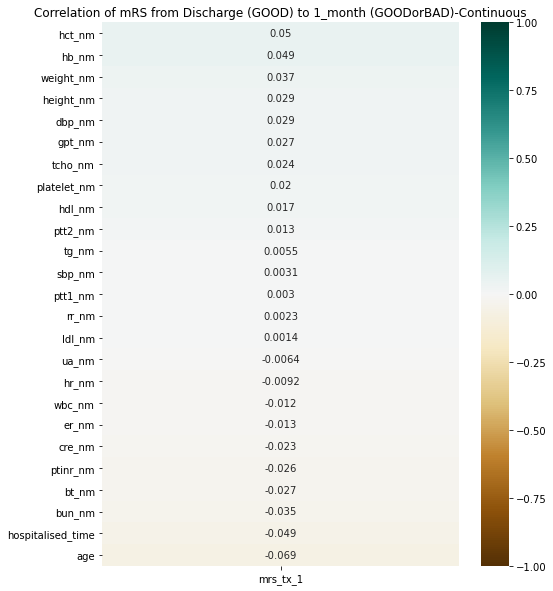

In [19]:
from scipy.stats import pointbiserialr

correlation_continuous = []
for  i in continuous:
    correlation = pointbiserialr(fromGto1m.mrs_tx_1, fromGto1m[i])[0]
    correlation_continuous.append(correlation)

corr_cont = pd.DataFrame([continuous, correlation_continuous]).T
corr_cont.columns = ["", "mrs_tx_1"]
corr_cont = corr_cont.sort_values(by='mrs_tx_1', ascending=False).T
corr_cont.columns = corr_cont.iloc[0]
corr_cont = corr_cont.drop(corr_cont.index[0])
corr_cont = corr_cont.astype("float")

plt.figure(figsize=(8, 10))
sns.heatmap(corr_cont.T, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (GOOD) to 1_month (GOODorBAD)-Continuous')
plt.savefig('INFO/TSR_ALL1/Correlation of mRS from Discharge (GOOD) to 1_month (GOODorBAD)-Continuous.png')
plt.show()

## Categorical Features

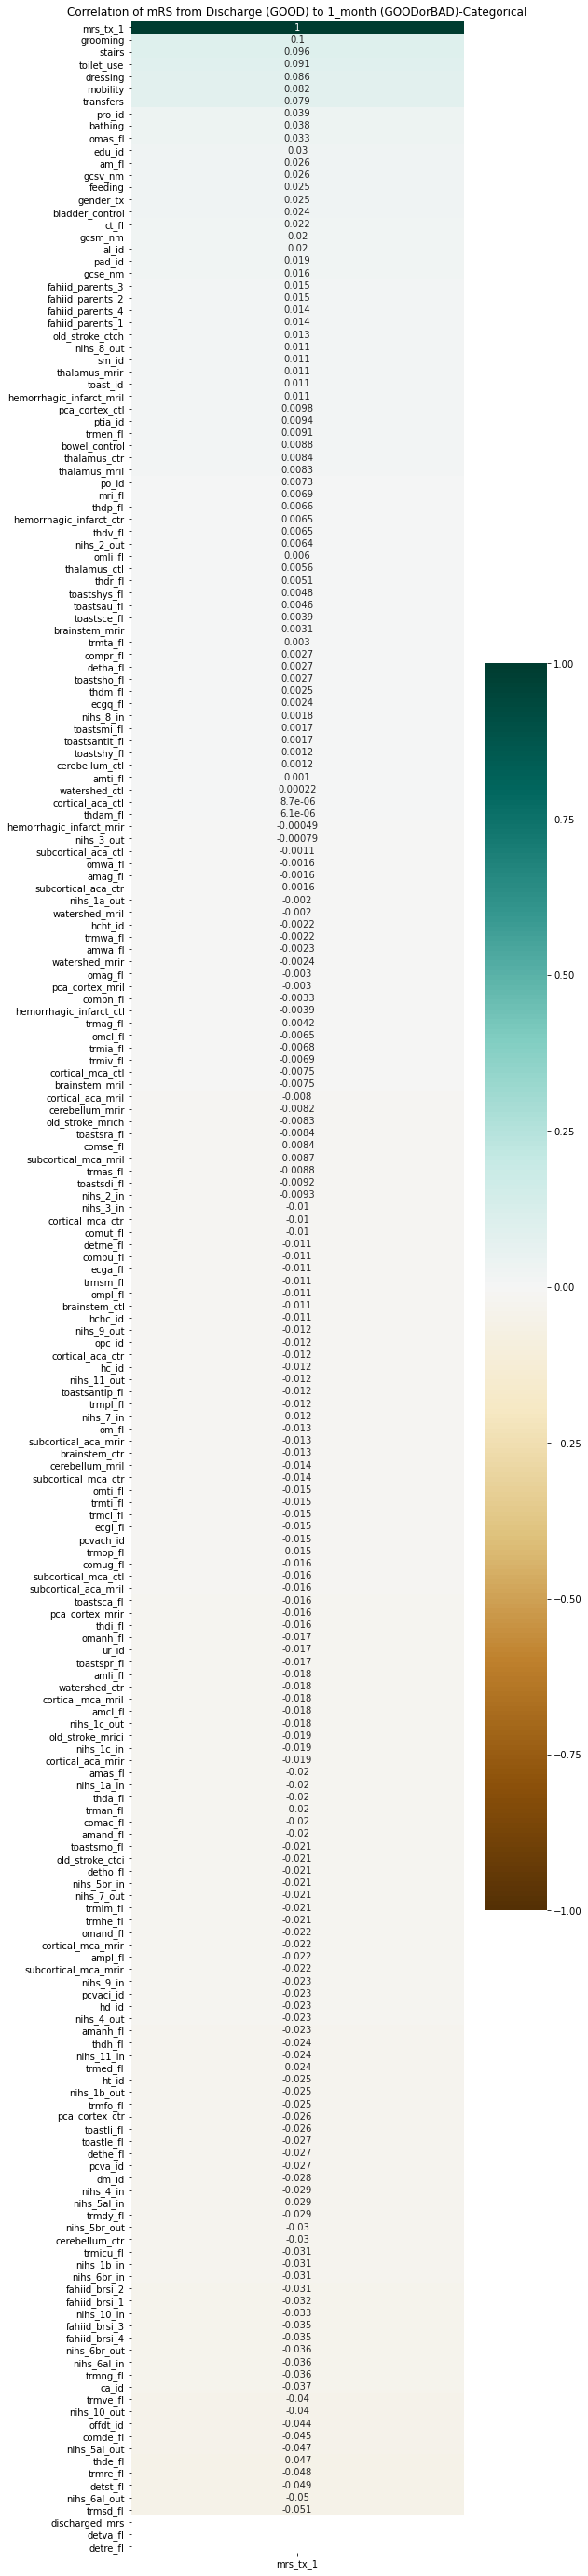

In [20]:
plt.figure(figsize=(8, 50))
sns.heatmap(fromGto1m[(nominal_features+ordinal_features+boolean+ labels)].corr(method= "kendall")[['mrs_tx_1']].sort_values(by='mrs_tx_1', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (GOOD) to 1_month (GOODorBAD)-Categorical')
plt.savefig('INFO/TSR_ALL1/Correlation of mRS from Discharge (GOOD) to 1_month (GOODorBAD)-Categorical.png')
plt.show()

# Correlation of mRS from Discharge (BAD) to 3-month (GOOD/BAD)

In [21]:
fromBto1m = tsr_all1_df[(tsr_all1_df.discharged_mrs == 0)]
print("The shape of mRS from Discharge (BAD) to 1-month (GOOD/BAD):", fromBto1m.shape)

The shape of mRS from Discharge (BAD) to 1-month (GOOD/BAD): (24144, 233)


## Continuous Features

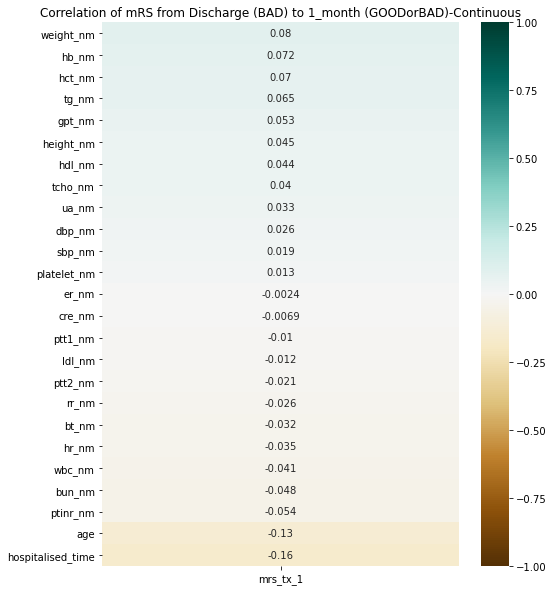

In [22]:
from scipy.stats import pointbiserialr

correlation_continuous = []
for  i in continuous:
    correlation = pointbiserialr(fromBto1m.mrs_tx_1, fromBto1m[i])[0]
    correlation_continuous.append(correlation)

corr_cont = pd.DataFrame([continuous, correlation_continuous]).T
corr_cont.columns = ["", "mrs_tx_1"]
corr_cont = corr_cont.sort_values(by='mrs_tx_1', ascending=False).T
corr_cont.columns = corr_cont.iloc[0]
corr_cont = corr_cont.drop(corr_cont.index[0])
corr_cont = corr_cont.astype("float")

plt.figure(figsize=(8, 10))
sns.heatmap(corr_cont.T, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (BAD) to 1_month (GOODorBAD)-Continuous')
plt.savefig('INFO/TSR_ALL1/Correlation of mRS from Discharge (BAD) to 1_month (GOODorBAD)-Continuous.png')
plt.show()

## Categorical Features

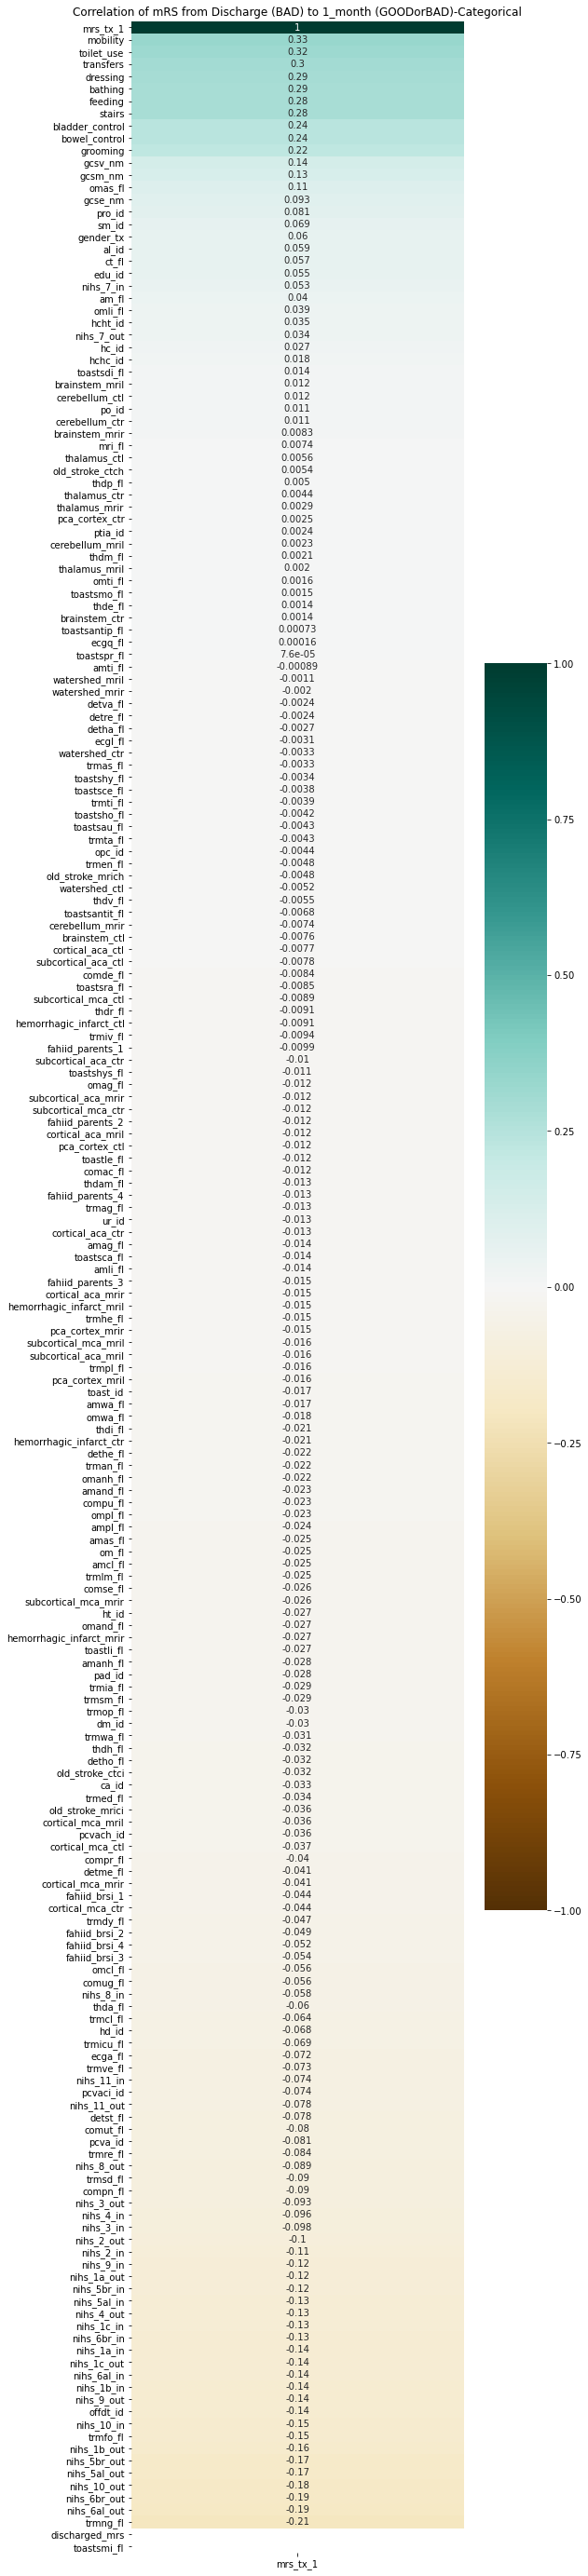

In [23]:
plt.figure(figsize=(8, 50))
sns.heatmap(fromBto1m[(nominal_features+ordinal_features+boolean+ labels)].corr(method= "kendall")[['mrs_tx_1']].sort_values(by='mrs_tx_1', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (BAD) to 1_month (GOODorBAD)-Categorical')
plt.savefig('INFO/TSR_ALL1/Correlation of mRS from Discharge (BAD) to 1_month (GOODorBAD)-Categorical.png')
plt.show()